# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Accent'))
import plotly.express as px
%matplotlib inline


from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans

# Data Wrangling

Steps in Data Wrangling:
* Data Loading
* Data Exploration
* Data Structuring
* Data Cleaning
* Data Publishing

## Data Loading

In [2]:
# Importing the data from json file

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)

profile = pd.read_json('data/profile.json', orient='records', lines=True)

transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration

Prilimainary exploration of the raw data from the json file. 

### Portfolio Data


**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

In [3]:
#Glimpse of Portfolio data
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [4]:
#Info of portfolio data
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [5]:
#Discription of Protfolio Data
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [6]:
#Duplicat eand Null values check

print('No of Duplicate values =',portfolio['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', portfolio.isna().sum())

No of Duplicate values = 0


No of Null values

 reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


In [7]:
## Profile Data

### Profile Data

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income


In [8]:
#Glimpse of Profile data
profile.sample(10)

,gender,age,id,became_member_on,income
12458,None,118,c28414b774094421b34abfe44c6d303c,20180313,NaN
1276,M,30,f7058c1fbbed48689edd0440b4dd7ae5,20180621,55000.0
7860,None,118,70d11cdff70d4e7a9cb5d11cac23a88c,20171220,NaN
11009,M,56,bbdcf97a4eab4908a29c203ea8e133b6,20171126,73000.0
1641,M,54,72458fa98466484c85dd63393a243250,20170610,71000.0
9805,None,118,455d955f7c364290bd59e0c67f422324,20171226,NaN
9231,M,41,f26e371122ca443b957ce94bcd37f48d,20160610,61000.0
12191,F,58,ed0780d61c1a49699b6592a05f5ae459,20160228,51000.0
8433,F,50,13b9a30150f94769aa55535001893d4e,20160626,103000.0
6399,F,71,fab66562e2d74078b1306d2549e90543,20160210,79000.0


In [9]:
#Info of Profile data
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [10]:
#Discription of Profile Data
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


<AxesSubplot:xlabel='age'>

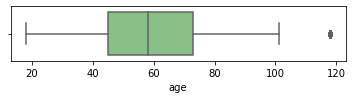

In [11]:
#Box plot for age distribution

plt.figure(figsize=[6,1])
sns.boxplot(data=profile, x='age')

There seems to be few very haigh values for age(eg: 118 yrs). This is  likely to be an erronious data. 

In [12]:
#Duplicate and Null values check


print('No of Duplicate values =',profile['id'].duplicated().sum())
print('\n')
print('No of Null values\n\n', profile.isna().sum())
print('\n')
# Checking percentage of null values
print('\nPercentage of missing data: ', round((profile.gender.isna().sum()*100 / profile.shape[0]),2),'%')


No of Duplicate values = 0


No of Null values

 gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64



Percentage of missing data:  12.79 %


<AxesSubplot:>

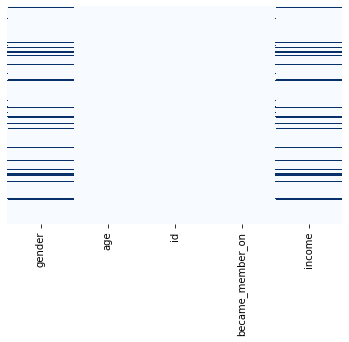

In [13]:

# Visualize Missing Data
sns.heatmap(profile.isnull(), yticklabels = False, cbar = False, cmap="Blues")


### Transcript Data

**transcript.json**

* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


In [14]:
#Glimpse of Profile data
transcript.sample(10)

,person,event,value,time
282117,86a32235141948dd85e67ad2a3b530c6,transaction,{'amount': 2.19},624
224917,0eae927d54084bd5925a65d801a665cf,transaction,{'amount': 1.99},516
240069,fff7576017104bcc8677a8d63322b5e1,transaction,{'amount': 2.08},558
195712,0cca2a7a1b6c44c9b0c7b78856dfd40b,transaction,{'amount': 14.01},480
118493,8ed64cd9600948b89eb41be4de183788,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},336
264727,7289d4edea3843f28c2ceeddcff360d2,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},582
272169,170fb4372d3a4cf3a09df0e5504546ee,transaction,{'amount': 15.8},600
296809,e4762356dd2a488bb6e0733a06469078,transaction,{'amount': 1.58},672
113012,0e1578217ad7455d8cb08509eeee1aee,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},336
86854,a7322a1900194a128175928b0b0cdadb,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},216


In [15]:
#Info of Profile data
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [16]:
#Discription of Profile Data
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [17]:
#Null values check

print('No of Null values\n\n', transcript.isna().sum())
print('\n')



No of Null values

 person    0
event     0
value     0
time      0
dtype: int64




## Data Structuring

### Portfolio

* 'Channels' colum is in the form of list.
* Rename column name to make it consistant actoss all datasets.
* Create a column offer_name, assign a recogonizable identifyer


In [18]:
def rename_cols(df, new_col_names):
    """
    INPUT
    ----------
    df: input dataframe for renaming columns
    new_col_names: define new column name for each column
    
    OUTPUT
    -------
    df: output data frame with renamed column names
       
    """

    df= df.rename(columns = new_col_names)
    return df

In [19]:
def clean_portfolio(portfolio=portfolio):
    '''
    INPUT:
    portfolio - (pandas dataframe), portfolio data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned portfolio data

    
    Description:
    This function cleans the dat and provides a DatFrame with Offer ID and other data about the offer. 
    '''    
    new_col_names_portfolio = {'difficulty':'offer_difficulty' , 'id':'offer_id', 
                 'duration':'offer_duration', 'reward': 'offer_reward'}
    portfolio  = portfolio.rename(columns= new_col_names_portfolio )
    
    
    #Create new column Offer name to assign a recogonizable identifyer for each of the 10 offers. 
    new_col = {'offer_name' : ['offer_1', 'offer_2','offer_3','offer_4',
                              'offer_5','offer_6','offer_7','offer_8','offer_9','offer_10' ]}
    portfolio['offer_name'] = pd.DataFrame(new_col)
    
    # One hot encode the 'offertype' column
    #offertype = pd.get_dummies(portfolio['offer_type'])
    
    # One hot encode the 'channels' columns
    mlb = MultiLabelBinarizer()
    mlb_fit = mlb.fit(portfolio['channels'])
    channels_df = pd.DataFrame(mlb_fit.transform(portfolio['channels']),columns=mlb_fit.classes_)
    
    #Drop the old 'channels'
    portfolio = portfolio.drop(columns=['channels'])
    
    #Replace the 'offertype' and 'channels' columns
    portfolio = pd.concat([portfolio, channels_df], axis=1)
    
    
    #Reorder the columns order
    portfolio = portfolio[[ 'offer_id','offer_name','offer_type' ,'offer_difficulty','offer_duration',
                           'offer_reward','email','mobile','social','web']]

    return portfolio

In [20]:
#Checking the data


portfolio_df = clean_portfolio(portfolio)
#portfolio_df = portfolio_df[['offer_reward', 'channels', 'offer_difficulty', 
                             #'offer_duration', 'offer_type', 'offer_id', 'offer_name']]
    
portfolio_df

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


### Profile 


* Rename 'id', 'income' column.
* Remove rows wth no 'income' data. 
* Encode 'gender' data. 
* Change datatype of 'became_member_on' column datatime.
* Grouup the age into age ranges. 
* Encode the age ranges. 


In [21]:
def clean_profile(profile = profile):

    '''
    INPUT:
    profile - (pandas dataframe), profile data
    
    OUTPUT:
    portfolio - (pandas dataframe), cleaned profile data

    
    Description:
    This function cleans the data and provides a DatFrame with cleaned profile data. 
    '''    
        
    #rename profile columns
    new_col_profile = {'id':'customer_id' , 'income':'customer_income'}
    profile = rename_cols(profile, new_col_profile )
    
    #Removed those with no income data
    profile = profile[profile['customer_income'].notnull()]
    
    
    #Removed customer with unspecified Gender
    #profile = profile[profile['gender'] != 'O']
    profile = profile.reset_index(drop=True)
    
    #binarizerobj = LabelBinarizer()
    gender_df = pd.get_dummies(profile['gender']) 
    
    #gender_integer_map = {}
    #for i in binarizerobj.classes_:
      #  gender_integer_map[i] = binarizerobj.transform([i])[0,0]
        
        
    
    #Change datetype of bacame_member_on column
    profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d')   
    #Encode the year values
    profile['membership_year'] = profile['became_member_on'].apply(lambda elem: elem.year)
    membership_year_df = pd.get_dummies(profile['membership_year'])
    
    
    #Group the Salary ranges
    sal_labels = ['Under $25K',' $25,000 - $49,999','$50,000 - $74,999','$75,000 - $99,999', '$100K']
    
    profile['customer_income_range'] = pd.cut(profile['customer_income'], 
                                                      bins=[1, 25000, 49999, 74999, 99999, 150000] , 
                                  labels=sal_labels, include_lowest=True)
    # Encode for Age ranges
    salrange_df = pd.get_dummies(profile['customer_income_range'])
    
    
    #Group the age ranges
    labels = ['GenZ(18–25)', 'Millennias(26-43)', 'GenXers(44-56)',
                            'Boomers(57-75)', 'Matures(76+)']
    profile['age_group'] = pd.cut(profile['age'], bins=[18, 26, 44, 57, 76, 101] , 
                                  labels=labels, include_lowest=True)
    
    # Encode for Age ranges
    agerange_df = pd.get_dummies(profile['age_group'])
    
    
    # Appened all the encoded variables to the main dataframe
    profile = pd.concat([profile,gender_df,
                         agerange_df,salrange_df,
                         membership_year_df], axis=1)

    
    # Drop depcreated columns
    profile_da = profile[['customer_id', 'gender','age',
            'age_group','customer_income','customer_income_range',
            'became_member_on','membership_year']]
    
    profile_m = profile[['customer_id','F','M','O',
            'GenZ(18–25)','Millennias(26-43)','GenXers(44-56)',
            'Boomers(57-75)','Matures(76+)',
            '$50,000 - $74,999','$75,000 - $99,999','$100K',
            2013, 2014, 2015, 2016, 2017, 2018]]

    return profile_da , profile_m
profile_df, profile_m = clean_profile(profile)


In [22]:
profile_df.columns

Index(['customer_id', 'gender', 'age', 'age_group', 'customer_income',
       'customer_income_range', 'became_member_on', 'membership_year'],
      dtype='object')

### Transcript:


* Rename 'person', 'offerid' columns. 
* Remove customer ids that are not in 'Profile' data. 
* Convert hours to days and rename the 'time' column to 'time_in_days'
* Extract 'offer_id' and -amount' details from the 'value' column and store them in separate columns.
* Create 2 data frames one with Transaction data and another with offer data.

In [23]:
def clean_transcript(transcript =transcript):
    
    # Rename Transcript columns
    new_col_transcript = {'person': 'customer_id' , 'offerid' : 'offer_id' }
    transcript = rename_cols(transcript, new_col_transcript)

    
    # Remove customer id's that are not in the customer profile DataFrame
    select_data = transcript['customer_id'].isin(profile['id'])
    transcript = transcript[select_data]
    
    # Convert from hours to days
    transcript['time'] = transcript['time'] // 24   
    
    # Change'person' column name to 'customer_id'
    transcript = transcript.rename(columns={'time': 'time_in_days'})
    
    transcript['offer_id'] =\
        transcript['value'].apply(lambda elem: list(elem.values())[0])
    
    #Create seperate Dataframes for Offers and Transactions
    
    #1.Create Dataframe for Transactions
    transactions = transcript[transcript['event']=='transaction'].drop(['value'], axis =1)
    transactions = transactions.rename(columns={'offer_id': 'amount'})
    
    
    # One hot encode customer offer events
    transcript = transcript[transcript['event'].isin(['offer received' , 
                                                      'offer completed', 'offer viewed' ])].drop(['value'], axis =1)
    event_df = pd.get_dummies(transcript['event'])
    
    #2.Create Dataframe for offers

    offers = pd.concat([transcript,event_df], axis =1)
    offers  = offers.rename(columns={'offer completed': 'completed','offer received':'received' , 'offer viewed': 'viewed'})
    #offers = offers[['offer_id','customer_id', 'time_in_days', 'completed',
           #'received', 'viewed']]
    
    return offers,transactions 
offers_df,transactions_df  = clean_transcript(transcript)

In [24]:
offers_df.sample(5)

,customer_id,event,time_in_days,offer_id,completed,received,viewed
221128,99a2fe3feea44fa6ae08c09f6f39cbeb,offer viewed,21,f19421c1d4aa40978ebb69ca19b0e20d,0,0,1
76486,90939ddaed134ce9b21590c319154395,offer viewed,7,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0,1
175234,172078490b5d4027add9d498e5a8db95,offer viewed,17,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1
53881,f5112242df984403bfb4176d4487aef3,offer received,7,3f207df678b143eea3cee63160fa8bed,0,1,0
866,5589f5c4d6164cb4bd1feaca5384315e,offer received,0,2906b810c7d4411798c6938adc9daaa5,0,1,0


In [25]:
transactions_df.sample(5)

,customer_id,event,time_in_days,amount
297023,8d30c524932649a5b4021e56f6ad9580,transaction,28,28.07
302919,14beaba5927246a8891d3c74257a9a99,transaction,29,11.58
48360,38c97d85297f457b840598663093b3ad,transaction,5,18.89
233551,fe245b31d1334751906c8ce0cd833a64,transaction,22,3.7
298835,be6ccf64d69c4b14905cfc81e614cee7,transaction,28,1.9


## Portfolio: Data Analysis

In [26]:
display(portfolio_df)

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


In [27]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_id          10 non-null     object
 1   offer_name        10 non-null     object
 2   offer_type        10 non-null     object
 3   offer_difficulty  10 non-null     int64 
 4   offer_duration    10 non-null     int64 
 5   offer_reward      10 non-null     int64 
 6   email             10 non-null     int32 
 7   mobile            10 non-null     int32 
 8   social            10 non-null     int32 
 9   web               10 non-null     int32 
dtypes: int32(4), int64(3), object(3)
memory usage: 768.0+ bytes


In [28]:
portfolio_df['offer_type'].value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

## Profile: Data Exploration

In [29]:
display(profile_df)

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K,2017-07-15,2017
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K,2017-05-09,2017
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$50,000 - $74,999",2018-04-26,2018
3,389bc3fa690240e798340f5a15918d5c,M,65,Boomers(57-75),53000.0,"$50,000 - $74,999",2018-02-09,2018
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Boomers(57-75),51000.0,"$50,000 - $74,999",2017-11-11,2017
...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,GenXers(44-56),54000.0,"$50,000 - $74,999",2018-06-04,2018
14821,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Boomers(57-75),72000.0,"$50,000 - $74,999",2018-07-13,2018
14822,01d26f638c274aa0b965d24cefe3183f,M,49,GenXers(44-56),73000.0,"$50,000 - $74,999",2017-01-26,2017
14823,9dc1421481194dcd9400aec7c9ae6366,F,83,Matures(76+),50000.0,"$50,000 - $74,999",2016-03-07,2016


In [30]:
print(pd.DataFrame(profile_df['age'].describe()))
print('')
print(pd.DataFrame(profile_df['customer_income'].describe()))

                age
count  14825.000000
mean      54.393524
std       17.383705
min       18.000000
25%       42.000000
50%       55.000000
75%       66.000000
max      101.000000

       customer_income
count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000


In [31]:
profile_df = profile_df[profile_df['customer_income'].notnull()]
print(profile_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            14825 non-null  object        
 1   gender                 14825 non-null  object        
 2   age                    14825 non-null  int64         
 3   age_group              14825 non-null  category      
 4   customer_income        14825 non-null  float64       
 5   customer_income_range  14825 non-null  category      
 6   became_member_on       14825 non-null  datetime64[ns]
 7   membership_year        14825 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 840.1+ KB
None


Median Age  : $ 55.0


Text(0.5, 1.0, 'Age Distribution')

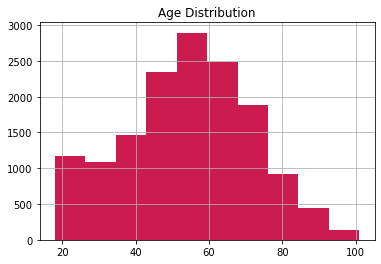

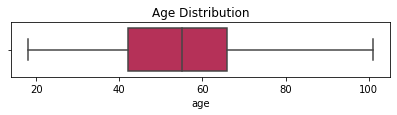

In [32]:
# Age Distributiobn:Histogram
sns.set_palette(sns.color_palette('rocket',1))
profile_df['age'].hist(bins=10)

plt.title('Age Distribution')

#Age distribution: Box Plot

print("Median Age  : $",profile_df['age'].median())


plt.figure(figsize=[6.8,1])
sns.boxplot(data=profile_df, x='age')
plt.title('Age Distribution')

Code Age in terms of Generation criteria:
- Gen Z: 18 – 25
- Millennials: 26 – 43
- Gen Xers: 44 – 56
- Boomers: 57 – 75
- Matures: 76+ ]


In [33]:
profile_df['age_group'].value_counts()

Boomers(57-75)       5147
GenXers(44-56)       4058
Millennias(26-43)    2956
Matures(76+)         1495
GenZ(18–25)          1169
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Customer Age group')

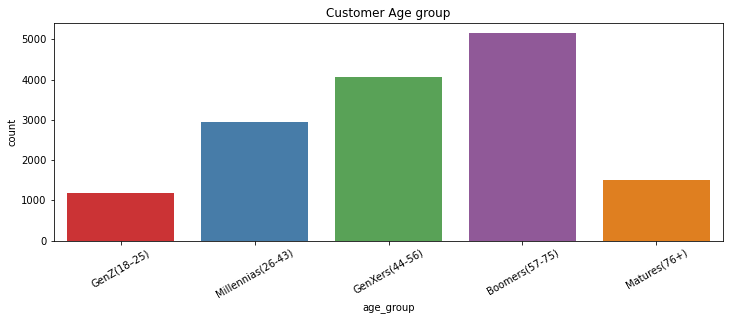

In [34]:
#Group the age ranges
sns.set_palette(sns.color_palette('Set1',5))
fig = plt.figure(figsize = (12,4))
sns.countplot(x='age_group',data=profile_df)
plt.xticks(rotation=30)
plt.title('Customer Age group')


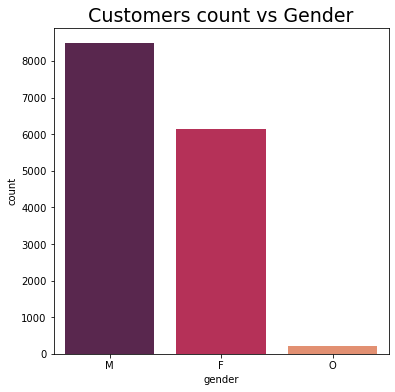

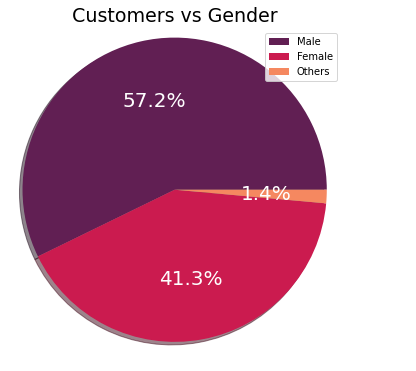

In [35]:
#Gender distribution
sns.set_palette(sns.color_palette('rocket',3))
plt.figure(figsize=[6,6])
sns.countplot(x= profile_df['gender'], order = profile_df['gender'].value_counts().index)

plt.title('Customers count vs Gender', fontsize=19)

#Gender Distribution in Percentage

gender = profile_df['gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender, labels=['Male', 'Female' , 'Others'], shadow=True, autopct='%1.1f%%', 
            textprops={'color': "w", 'fontsize': 20})

plt.axis('equal')
plt.title('Customers vs Gender', fontsize=19)
plt.legend(loc='best')

In [36]:
display.brewer.all()

AttributeError: 'function' object has no attribute 'brewer'

In [ ]:
gender

In [ ]:
#Analyze income:

profile_df['customer_income'].describe()


In [ ]:
#Income distribution
sns.set_palette(sns.color_palette('rocket',3))
plt.figure(figsize=[12,4])
sal_hist1 = sns.histplot(data = profile_df, x = 'customer_income',  multiple = "dodge",element = 'step', 
                        bins = 20, kde = True ,stat = 'density' ).set_title("Customer Income distribution")
plt.xlabel("Salary(USD)")

#Income distribution by gender

plt.figure(figsize=[12,4])
sal_hist = sns.histplot(data = profile_df, x = 'customer_income', hue = 'gender', 
                        multiple = "dodge",element = 'step', bins = 20, kde = True ,stat = 'density' ).set_title("Gender wise Customer Income distribution")
plt.xlabel("Salary(USD)")

In [37]:
#Median Income

print("Median Income  : $",profile_df['customer_income'].median())
print("Maximum Income : $",profile_df['customer_income'].max())
print("Maximum Income : $",profile_df['customer_income'].min())

print("Median Income for Males  : $",profile_df[profile_df['gender']=='M']['customer_income'].median())

print("Median Income Females : $",profile_df[profile_df['gender']=='F']['customer_income'].median())



Median Income  : $ 64000.0
Maximum Income : $ 120000.0
Maximum Income : $ 30000.0
Median Income for Males  : $ 59000.0
Median Income Females : $ 71000.0


In [38]:
#profile_df['became_member_on'] = pd.to_datetime(profile['became_member_on'], format = '%Y%m%d') 

Text(0, 0.5, 'Number of Customers or Test Subjects')

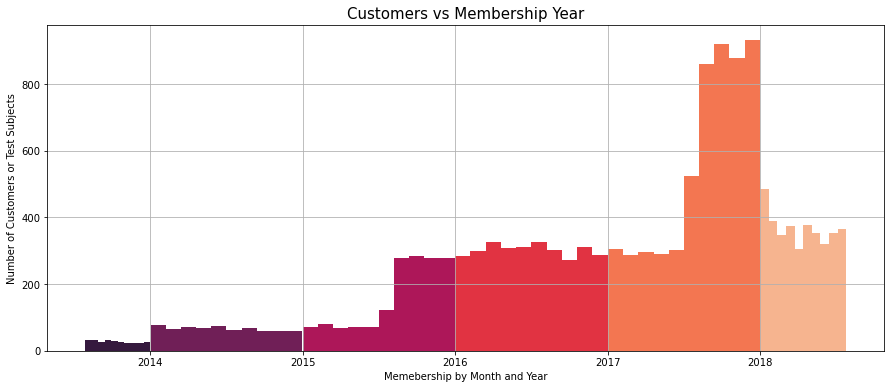

In [39]:
# membership by year of joining
sns.set_palette(sns.color_palette('rocket'))
plt.figure(figsize=(15, 6))
profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year).hist(bins=10)
plt.title('Customers vs Membership Year', fontsize=15)
plt.xlabel('Memebership by Month and Year')
plt.ylabel('Number of Customers or Test Subjects')

In [40]:
profile_df['became_member_on'].groupby(profile_df['became_member_on'].dt.year)
profile_df['became_member_on'].min()

Timestamp('2013-07-29 00:00:00')

In [41]:
profile_df['became_member_on'].max()

Timestamp('2018-07-26 00:00:00')

## Transcript: Data Exploration

In [42]:
#Seperatng transaction and offer data from transcript dataframe

offers_df, transactions_df = clean_transcript(transcript)

In [43]:
#Offer Data
offers_df.sample(10)

,customer_id,event,time_in_days,offer_id,completed,received,viewed
137058,a67840bbafb045c4a2ab9491e958bbac,offer viewed,15,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,1
292793,549917c84f5d4f30ad2052e8e7210578,offer completed,27,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0
259800,9d8f44ec36614d7c992fa640ae133fc3,offer viewed,24,2298d6c36e964ae4a3e7e9706d1fb8c2,0,0,1
58766,ec8a12c9d36142efbff26a115fcc491d,offer received,7,2906b810c7d4411798c6938adc9daaa5,0,1,0
128563,43ddc0d38ac4481e9bbf42310114fea3,offer viewed,14,f19421c1d4aa40978ebb69ca19b0e20d,0,0,1
141125,b9c59c0158ec4c4c9bdc7ad7796fd50f,offer viewed,15,fafdcd668e3743c1bb461111dcafc2a4,0,0,1
205610,39946f79aeb948d1be8a62ac68bf66df,offer received,21,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0
8956,8d4d3da98c7b40d4840564524c0d0d4a,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0
249680,020d72e77c704c42bb0a858c1aaa3bcd,offer received,24,3f207df678b143eea3cee63160fa8bed,0,1,0
204909,e5747aa5f9cd4079ba6d76cbd0b9363c,offer received,21,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0


In [44]:
#Transactions Data
transactions_df.sample(10)

,customer_id,event,time_in_days,amount
139190,75225655a1c44546a18f100f7c864f98,transaction,15,1.01
265287,ca253788781646f0a02492a0447ecf17,transaction,24,10.28
34338,9a138d2b107142d795f46b7600fd3dff,transaction,2,14.08
15546,c3844096da5e4e25a8d53a4164617b35,transaction,0,4.51
67254,f007c1392ef749c5b245ffb3cd5e6e35,transaction,7,20.91
192179,b39042dc2414439695d395c59b247a03,transaction,19,22.38
127195,8b5ae6d6547745d5adae0b0828de3f7d,transaction,14,29.13
231086,85240db9bdca4e5486b9837ae5ceea59,transaction,22,0.6
280713,9c53c8d4129d41908edaf53e2865baf5,transaction,25,0.77
128193,ad05dadd098c46cba692bb37e5fd739e,transaction,14,31.61


In [45]:

offers_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167581 entries, 0 to 306527
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   167581 non-null  object
 1   event         167581 non-null  object
 2   time_in_days  167581 non-null  int64 
 3   offer_id      167581 non-null  object
 4   completed     167581 non-null  uint8 
 5   received      167581 non-null  uint8 
 6   viewed        167581 non-null  uint8 
dtypes: int64(1), object(3), uint8(3)
memory usage: 6.9+ MB


In [46]:

transactions_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 138953 entries, 12654 to 306533
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   138953 non-null  object
 1   event         138953 non-null  object
 2   time_in_days  138953 non-null  int64 
 3   amount        138953 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.3+ MB


In [47]:
offers_type = pd.merge(offers_df, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')
offers_type.head(2)

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1


In [48]:
data_all = pd.merge(offers_type, profile_df, left_on='customer_id', right_on='customer_id', how='inner')
data_all.head(2)

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,...,mobile,social,web,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,...,1,0,1,F,75,Boomers(57-75),100000.0,$100K,2017-05-09,2017
1,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,offer_4,bogo,5,...,1,0,1,F,75,Boomers(57-75),100000.0,$100K,2017-05-09,2017


<AxesSubplot:title={'center':'Informational'}, ylabel='Count'>

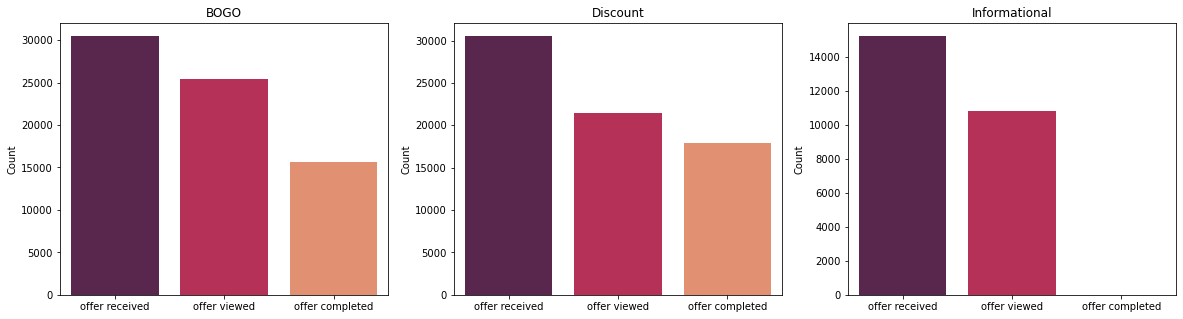

In [49]:
#Comparing offer recieved, viewed, completed by offer type

def offer_conversion_rate(offers_type):
    
    df_graph = offers_type.groupby(['event', 'offer_type'])['customer_id'].count().reset_index()
    df_graph['event'] = pd.Categorical(df_graph['event'], ["offer received", "offer viewed", "offer completed"])

    df_graph.sort_values('event', inplace = True)
    df_graph = df_graph.rename(columns = {'customer_id':'customer_count'})

    df_graph.sort_values('event', inplace=True)

    fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

    sns.set_palette(sns.color_palette("rocket",3))

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "bogo"'),ax=axs[0])
    ax.set(xlabel='', ylabel='Count', title='BOGO')

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "discount"'),ax=axs[1])
    ax.set(xlabel='', ylabel='Count', title='Discount')

    ax = sns.barplot(x = 'event', y='customer_count', data=df_graph.query('offer_type == "informational"'), ax=axs[2])
    ax.set(xlabel='', ylabel='Count', title='Informational')
    
    return ax

offer_conversion_rate(offers_type)